In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('../df_for_EDA.csv')
FILE_ID = "1ZAaB3w-ssykhQXt8ikc9w4RM3seucxpQ"
file_url = f"https://drive.google.com/uc?id={FILE_ID}"
df = pd.read_csv(file_url)
df

,Unnamed: 0,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [2]:
df = df.drop('Unnamed: 0', axis=1)

Набор данных взят из продолжающегося исследования сердечно-сосудистых заболеваний среди жителей города Фрамингем, штат Массачусетс.

Данные включают прогнозирование 10-летного риска развития ишемической болезни сердца у пациентов (таргет - TenYearCHD)

Набор содержит информацию о 3390 пациентов и включает 15 признаков (демографические данные, поведенческие и медицинские показатели)

In [3]:
# Размер датасета
df.shape

(3390, 17)

In [4]:
# Информация об изначальном датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Посмотрим на типы у признаков

In [5]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Первичная структурная проверка

In [6]:
EXPECTED_SCHEMA = {
    'id': 'int64', 
    'age': 'int64',
    'education': 'int64',
    'sex': 'int64',
    'is_smoking': 'int64',
    'cigsPerDay': 'int64',
    'BPMeds': 'int64',
    'prevalentStroke': 'int64',
    'prevalentHyp': 'int64',
    'diabetes': 'int64',
    'totChol': 'int64',
    'sysBP': 'float64',
    'diaBP': 'float64',
    'BMI': 'float64',
    'heartRate': 'int64',
    'glucose': 'int64',
    'TenYearCHD': 'int64'
}

EXPECTED_COLUMNS = list(EXPECTED_SCHEMA.keys())

In [ ]:
def validate_structure(df):
    # Базовая статистика структуры
    print(f"Записей: {len(df):,}")
    print(f"Столбцов: {len(df.columns)}")
    print(f"Пропущенных значений: {df.isnull().sum().sum():,}")

    missing_cols = set(EXPECTED_COLUMNS) - set(df.columns)
    extra_cols = set(df.columns) - set(EXPECTED_COLUMNS)
    
    if missing_cols:
        print(f"Отсутствуют столбцы: {missing_cols}")
    if extra_cols:
        print(f"Лишние столбцы: {extra_cols}")
    
    print("\nНесоответствие типов данных:")
    for col, expected_type in EXPECTED_SCHEMA.items():
        if col in df.columns:
            actual_type = str(df[col].dtype)
            if actual_type != expected_type:
                print(f"{col}: ожидался {expected_type}, получен {actual_type}")
    # Проверка на дубликаты
    if 'id' in df.columns:
        duplicate_ids = df['id'].duplicated().sum()
        if duplicate_ids > 0:
            print(f"Дубликаты ID: {duplicate_ids}")

# Обнаружение изменений
def detect_schema_drift(df_old, df_new):
    drift_detected = False
    
    cols_old = set(df_old.columns)
    cols_new = set(df_new.columns)
    
    added_cols = cols_new - cols_old
    removed_cols = cols_old - cols_new
    
    if added_cols:
        print(f"Добавлены столбцы: {added_cols}")
        drift_detected = True
    
    if removed_cols:
        print(f"Удалены столбцы: {removed_cols}") 
        drift_detected = True
    
    common_cols = cols_old & cols_new
    for col in common_cols:
        if df_old[col].dtype != df_new[col].dtype:
            print(f"Изменен тип {col}: {df_old[col].dtype} -> {df_new[col].dtype}")
            drift_detected = True
    
    if not drift_detected:
        print("Изменений схемы не обнаружен")

is_valid = validate_structure(df)

print(f"\nНемного изменяем данные, чтобы проверить обнаружения изменений")
df_modified = df.copy()
df_modified['new_column'] = 1
df_modified['age'] = df_modified['age'].astype(float)

detect_schema_drift(df, df_modified)

Записей: 3,390
Столбцов: 17
Пропущенных значений: 510

Несоответствие типов данных:
education: ожидался int64, получен float64
sex: ожидался int64, получен object
is_smoking: ожидался int64, получен object
cigsPerDay: ожидался int64, получен float64
BPMeds: ожидался int64, получен float64
totChol: ожидался int64, получен float64
heartRate: ожидался int64, получен float64
glucose: ожидался int64, получен float64

Немного изменяем данные, чтобы проверить обнаружения изменений
Добавлены столбцы: {'new_column'}
Изменен тип age: int64 -> float64


Лучше перевести данные в целочисленный тип, если это возможно. Категориальные типы с двумя значениями и бинарные также лучше перевести в целочисленный тип

### Оценка целостности и полноты

In [8]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
# Пропуски в данных
missing_pct = df.isna().mean()
missing_df = missing_pct[missing_pct > 0].reset_index()
missing_df.columns = ['Столбец', 'Доля_пропусков']
missing_df['Доля_пропусков'] = missing_df['Доля_пропусков'].apply(lambda x: f"{x:.1%}")
missing_df 

,Столбец,Доля_пропусков
0,education,2.6%
1,cigsPerDay,0.6%
2,BPMeds,1.3%
3,totChol,1.1%
4,BMI,0.4%
5,heartRate,0.0%
6,glucose,9.0%


У нас присутствуют пропуски, их нужно будет заполнить медианами значений

In [10]:
# Смотрим дубликаты по id
dup_count = df.duplicated(subset=['id']).sum()
print(f"Дубликаты по ID: {dup_count}")

Дубликаты по ID: 0


Дубликаты по id отсутствуют

### Семантический анализ

In [11]:
# Быстрая статистика для числовых признаков
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
# Посмотрим распределение таргета
df['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [13]:
# Поиск несоответствия бизнес-правилам
if 'price' in df.columns and (df['price'] < 0).any():
    print("Цены меньше 0")

if 'age' in df.columns:
    invalid_age = df[(df['age'] < 0) | (df['age'] > 100)]
    if len(invalid_age) > 0:
        print(f"Некорректный возраст: {len(invalid_age)} записей")

### Поиск выбросов и аномалий

In [14]:
numeric_columns = ['id', 'age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[f'{col}_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound))
    
    print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, "
          f"Границы: [{lower_bound:.2f}, {upper_bound:.2f}], "
          f"Выбросов: {df[f'{col}_outlier'].sum()}")

id: Q1=847.25, Q3=2541.75, IQR=1694.50, Границы: [-1694.50, 5083.50], Выбросов: 0
age: Q1=42.00, Q3=56.00, IQR=14.00, Границы: [21.00, 77.00], Выбросов: 0
education: Q1=1.00, Q3=3.00, IQR=2.00, Границы: [-2.00, 6.00], Выбросов: 0
cigsPerDay: Q1=0.00, Q3=20.00, IQR=20.00, Границы: [-30.00, 50.00], Выбросов: 9
totChol: Q1=206.00, Q3=264.00, IQR=58.00, Границы: [119.00, 351.00], Выбросов: 43
sysBP: Q1=117.00, Q3=144.00, IQR=27.00, Границы: [76.50, 184.50], Выбросов: 105
diaBP: Q1=74.50, Q3=90.00, IQR=15.50, Границы: [51.25, 113.25], Выбросов: 58
BMI: Q1=23.02, Q3=28.04, IQR=5.02, Границы: [15.49, 35.57], Выбросов: 77
heartRate: Q1=68.00, Q3=83.00, IQR=15.00, Границы: [45.50, 105.50], Выбросов: 64
glucose: Q1=71.00, Q3=87.00, IQR=16.00, Границы: [47.00, 111.00], Выбросов: 158


У нас присутствуют выбросы. Можем удалить значения, которые больше/меньше df.название_столбца.quantile(0.999)/df.название_столбца.quantile(0.002), чтобы не убирать больше 0.2% данных

<Axes: >

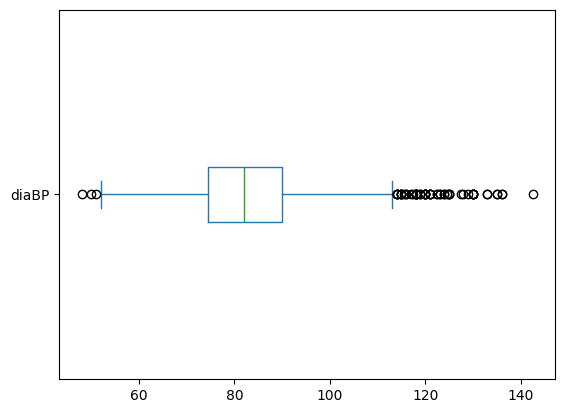

In [15]:
# Визуализация ящика с усами для признака 
df['diaBP'].plot.box(vert=False)

### Проверка взаимосвязей и согласованности

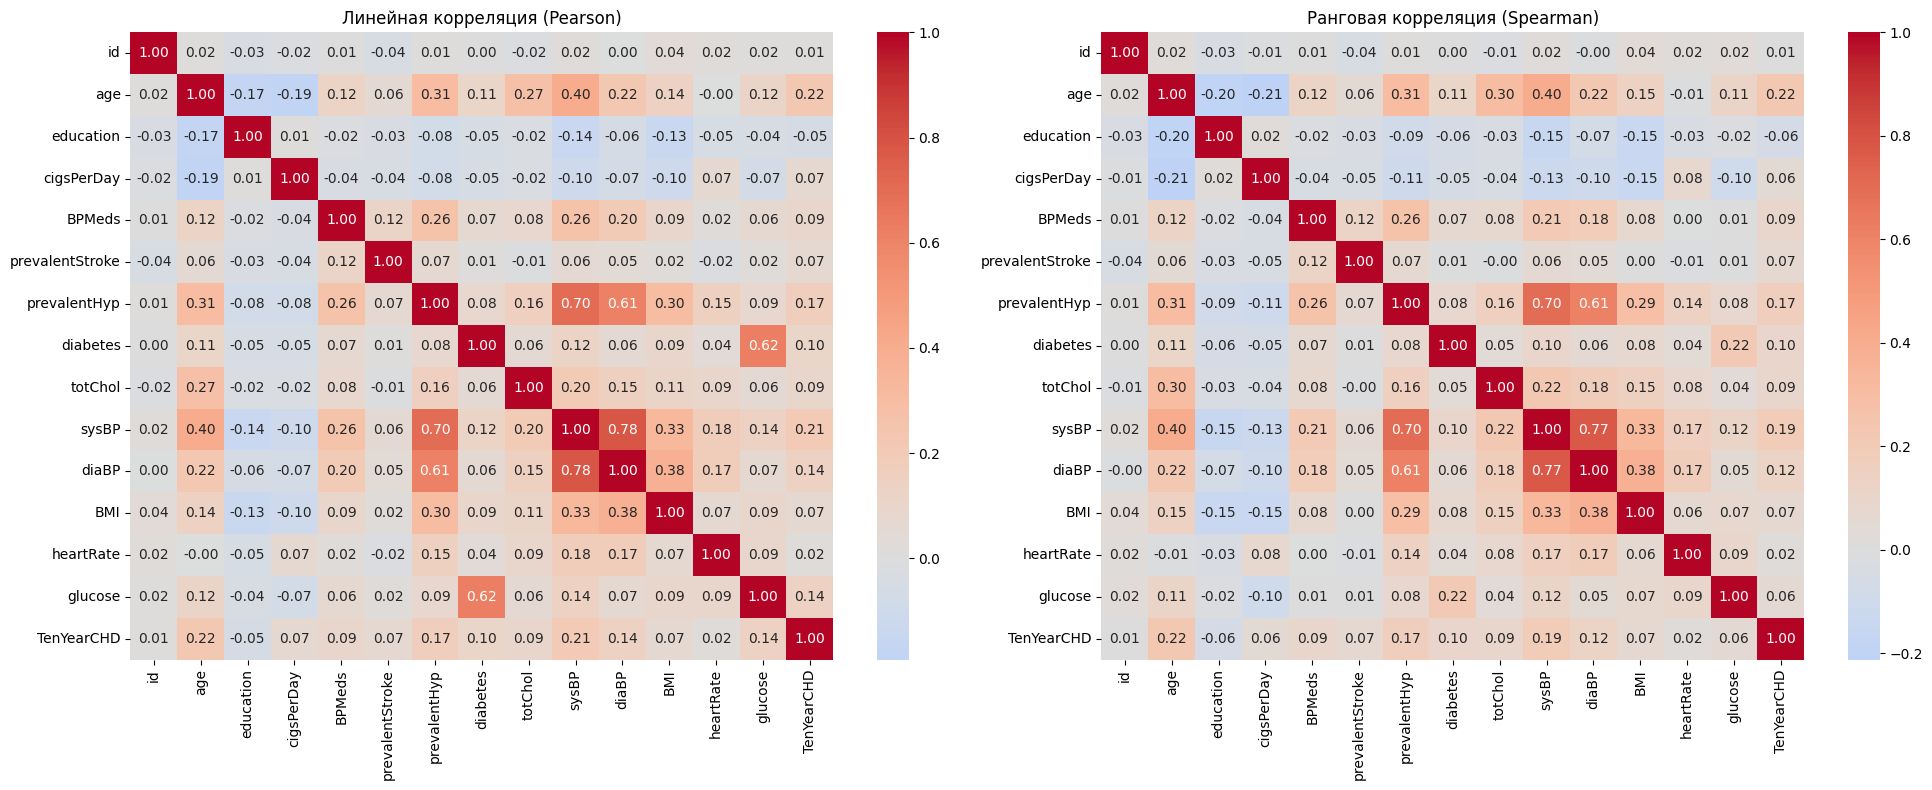

In [16]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
# Линейная корреляция (Pearson)
pearson_corr = df[numeric_columns].corr(method='pearson')
# Ранговая корреляция (Spearman)
spearman_corr = df[numeric_columns].corr(method='spearman')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Линейная корреляция (Pearson)')
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('Ранговая корреляция (Spearman)')
plt.tight_layout()
plt.show()

In [17]:
# Анализ сильных корреляций
print("Сильные линейные корреляции (|r| > 0.7):")
strong_corr_pearson = pearson_corr[(pearson_corr.abs() > 0.7) & (pearson_corr != 1.0)]
strong_corr_pearson.stack().sort_values(ascending=False)

Сильные линейные корреляции (|r| > 0.7):


sysBP  diaBP    0.781908
diaBP  sysBP    0.781908
dtype: float64

### Кросс-таблицы (pd.crosstab) для анализа категориальных связей

In [18]:
categorical_columns = ['education', 'sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

cross_smoke_diabetes = pd.crosstab(df['is_smoking'], df['diabetes'], margins=True, margins_name='Total')
cross_smoke_diabetes

diabetes,0,1,Total
is_smoking,,,
NO,1645,58,1703
YES,1658,29,1687
Total,3303,87,3390


In [19]:
cross_sex_chd = pd.crosstab(df['sex'], df['TenYearCHD'], normalize='index')  # в процентах по строкам
cross_sex_chd

TenYearCHD,0,1
sex,,
F,0.875715,0.124285
M,0.814588,0.185412


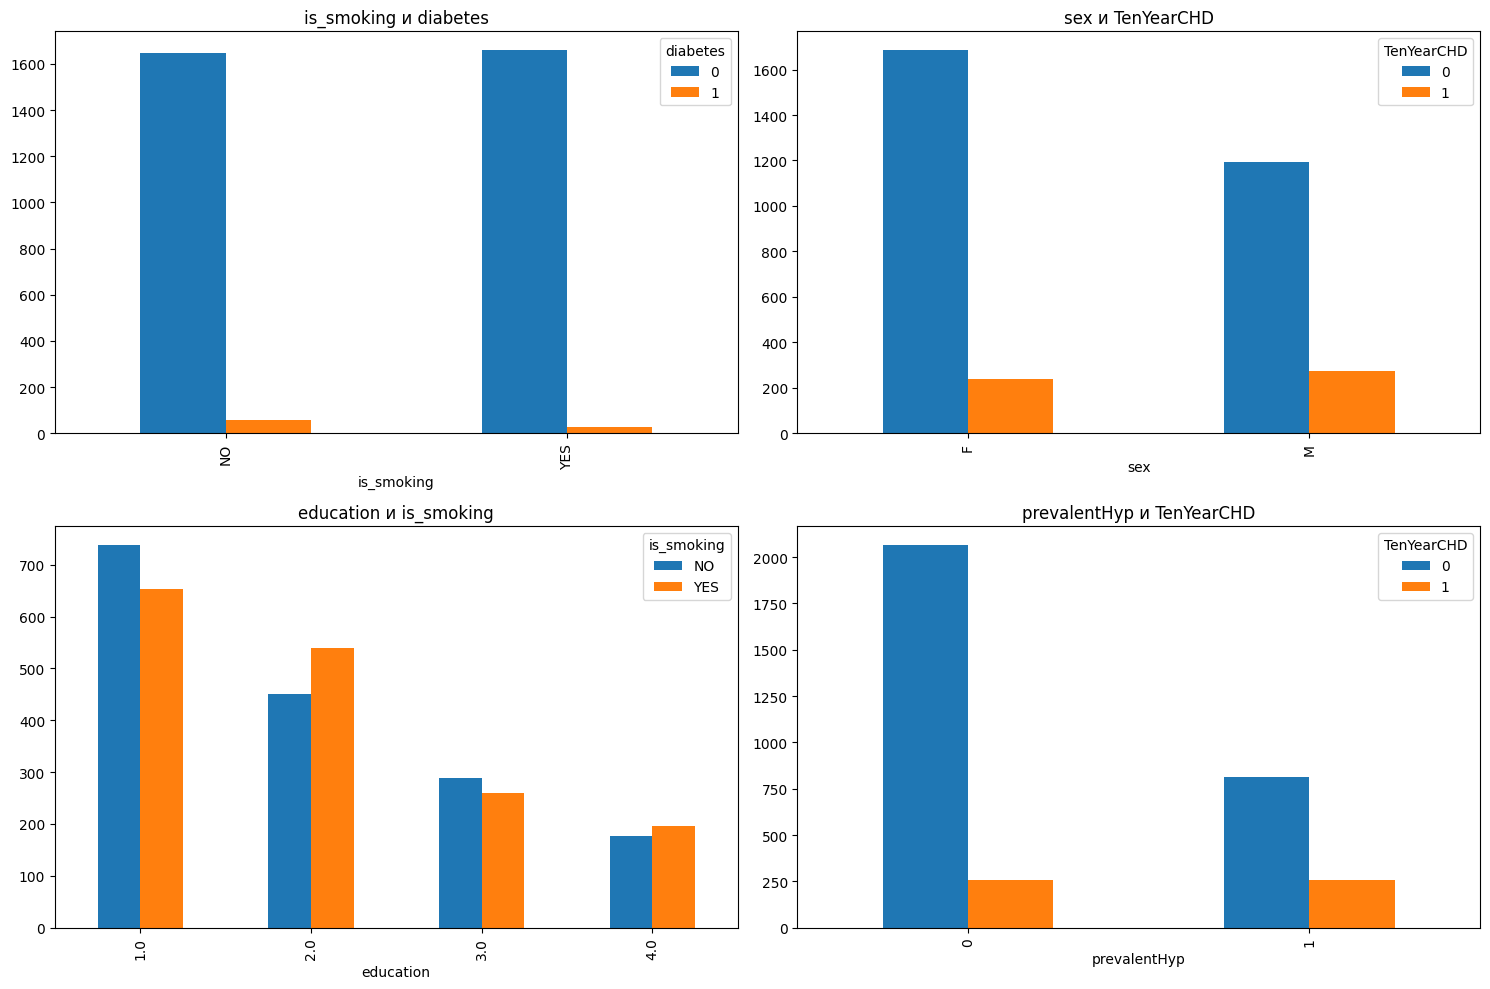

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

pd.crosstab(df['is_smoking'], df['diabetes']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('is_smoking и diabetes')

pd.crosstab(df['sex'], df['TenYearCHD']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('sex и TenYearCHD')

pd.crosstab(df['education'], df['is_smoking']).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('education и is_smoking')

pd.crosstab(df['prevalentHyp'], df['TenYearCHD']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('prevalentHyp и TenYearCHD')

plt.tight_layout()
plt.show()

### Визуальный анализ зависимостей (pd.plotting.scatter_matrix, pairplot)

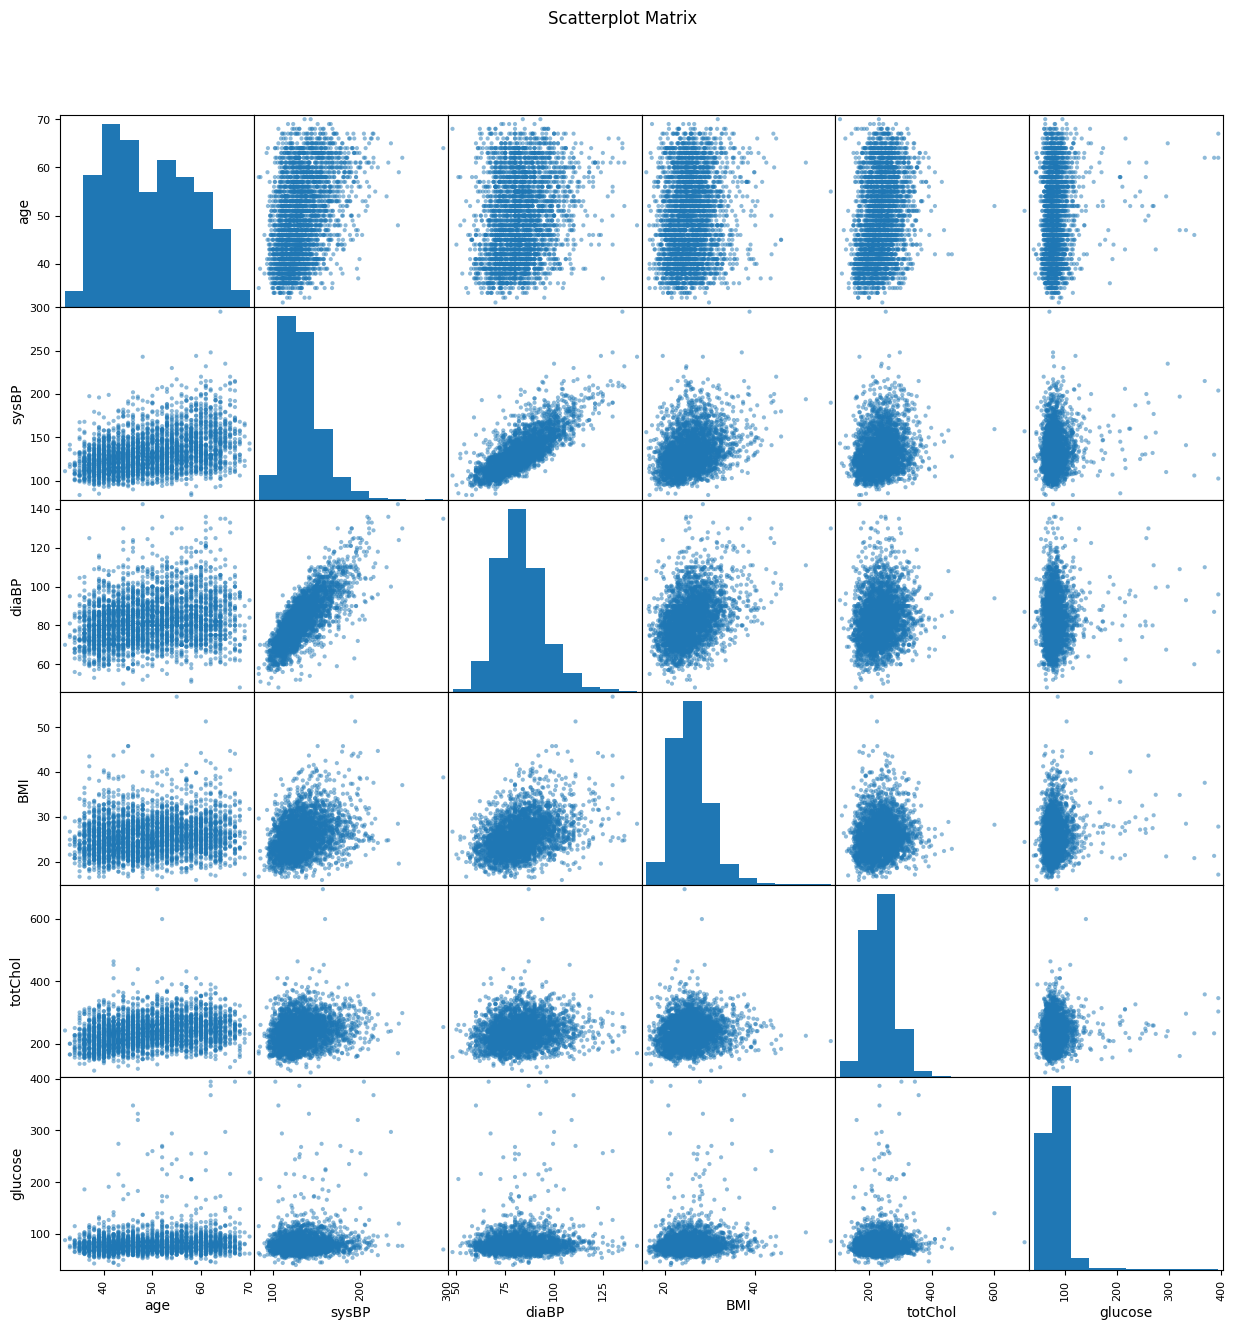

In [21]:
# Scatterplot Matrix
key_numeric = ['age', 'sysBP', 'diaBP', 'BMI', 'totChol', 'glucose']
pd.plotting.scatter_matrix(df[key_numeric], figsize=(15, 15), alpha=0.5)
plt.suptitle('Scatterplot Matrix', y=0.95)
plt.show()

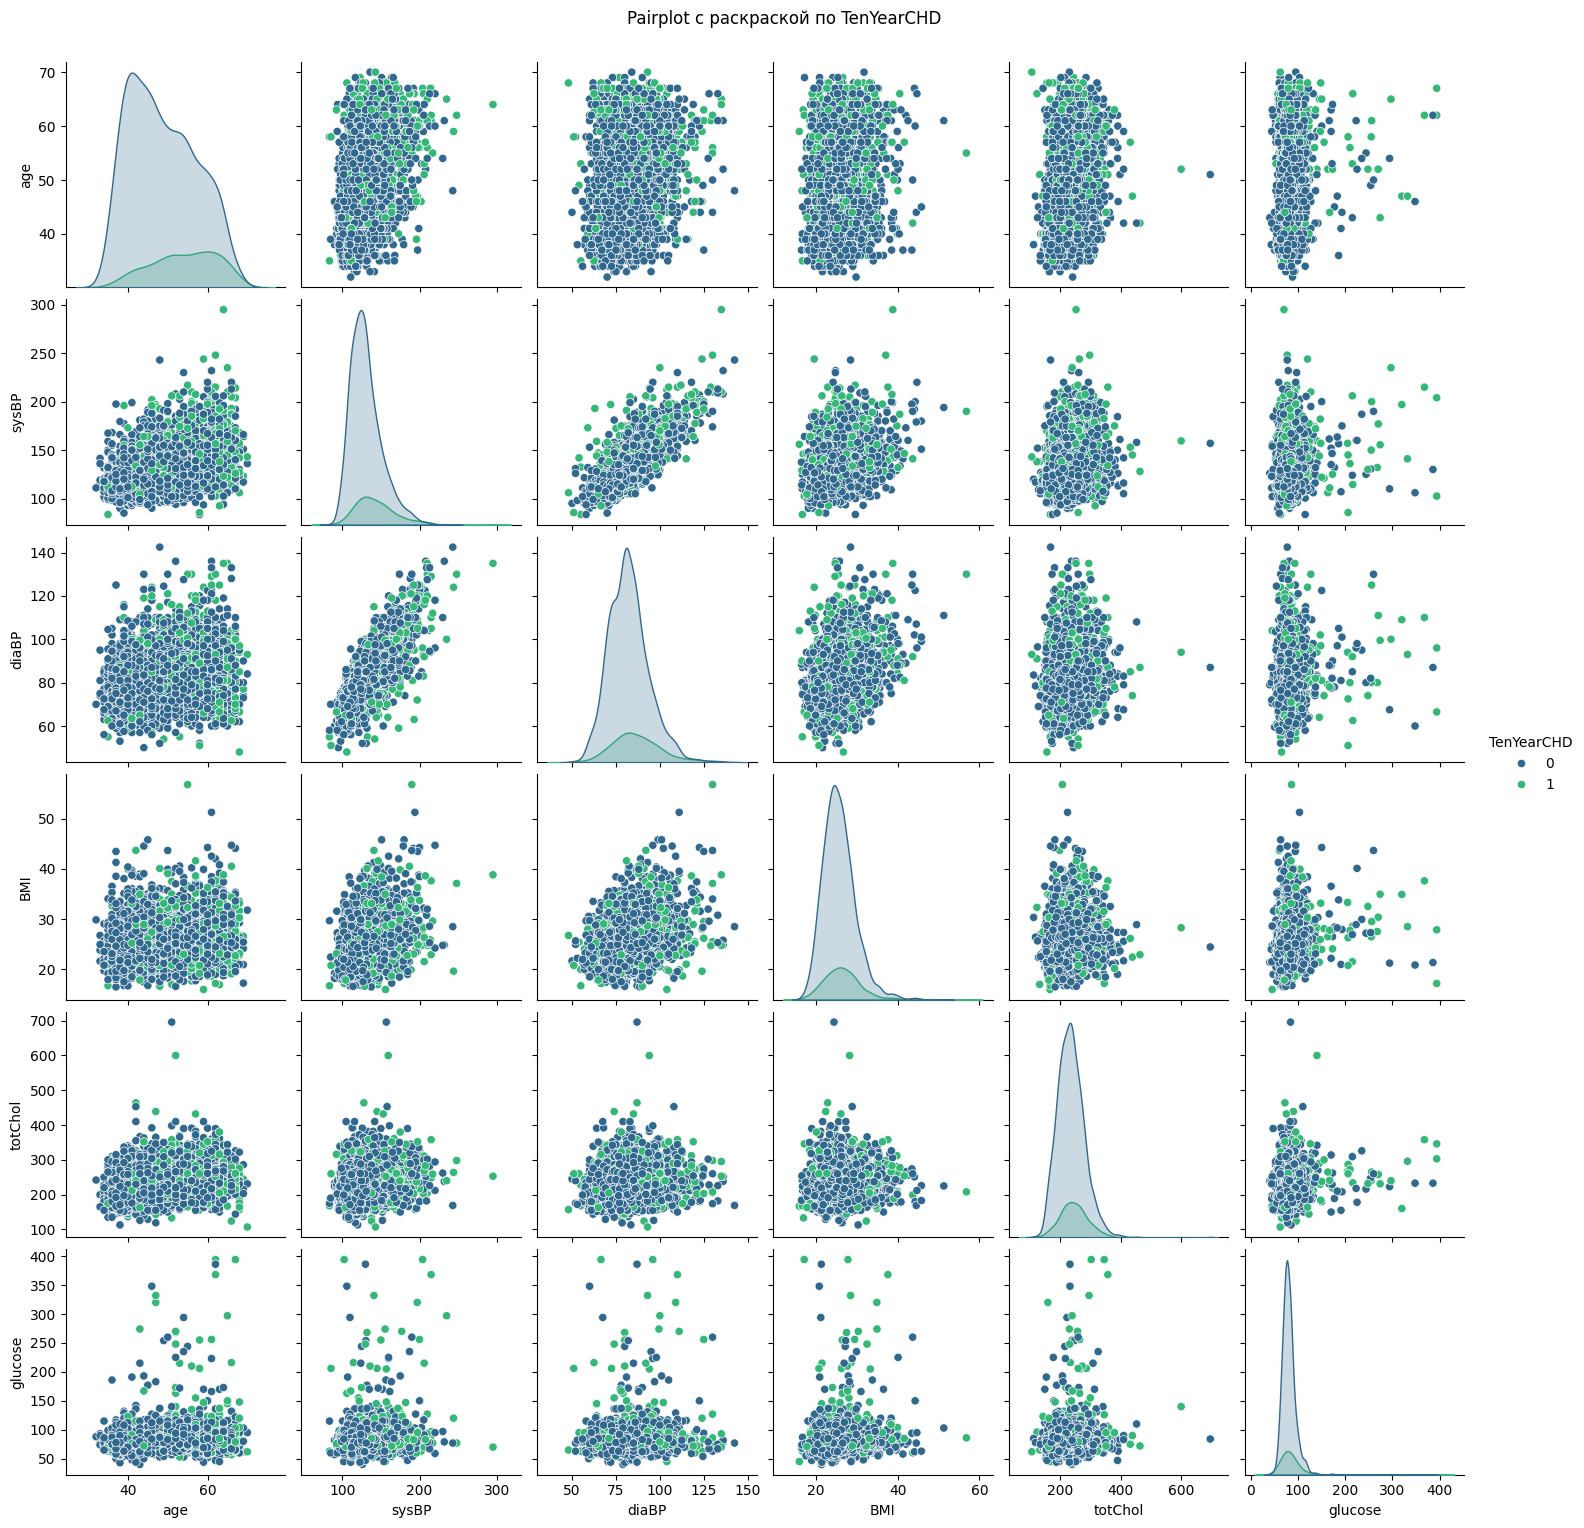

In [22]:
# Pairplot с раскраской по целевому признаку
sns.pairplot(df[key_numeric + ['TenYearCHD']], hue='TenYearCHD', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot с раскраской по TenYearCHD', y=1.02)
plt.show()

### Метрики качества данных

In [23]:
# Completeness — полнота данных. Измеряет долю непустых значений в каждом поле. ≥ 0.98
total_rows = len(df)

all_completeness_ratio = 0

for column in df.columns:
    non_null_count = df[column].notna().sum()
    completeness_ratio = non_null_count / total_rows
    status = "PASS" if completeness_ratio >= 0.98 else "FAIL"
    if completeness_ratio >= 0.98:
        all_completeness_ratio += completeness_ratio
    
    print(f"{column:<15} {completeness_ratio:>7.2%} {status}")

print(f"Общая полнота данных: {df.notna().mean().mean():.2%}")
print(f"Столбцов прошедших проверку: {round(all_completeness_ratio)}/{len(df.columns)}")

id              100.00% PASS
age             100.00% PASS
education        97.43% FAIL
sex             100.00% PASS
is_smoking      100.00% PASS
cigsPerDay       99.35% PASS
BPMeds           98.70% PASS
prevalentStroke 100.00% PASS
prevalentHyp    100.00% PASS
diabetes        100.00% PASS
totChol          98.88% PASS
sysBP           100.00% PASS
diaBP           100.00% PASS
BMI              99.59% PASS
heartRate        99.97% PASS
glucose          91.03% FAIL
TenYearCHD      100.00% PASS
id_outlier      100.00% PASS
age_outlier     100.00% PASS
education_outlier 100.00% PASS
cigsPerDay_outlier 100.00% PASS
totChol_outlier 100.00% PASS
sysBP_outlier   100.00% PASS
diaBP_outlier   100.00% PASS
BMI_outlier     100.00% PASS
heartRate_outlier 100.00% PASS
glucose_outlier 100.00% PASS
Общая полнота данных: 99.44%
Столбцов прошедших проверку: 25/27


Видим, что пропусков достаточно мало

In [24]:
# Uniqueness — уникальность записей. Проверяет, что идентификаторы и ключи не повторяются. = 1.0
id_columns = ['id']
potential_ids = [col for col in df.columns if 'id' in col.lower() or 'key' in col.lower()]
id_columns.extend(potential_ids)

for column in id_columns:
    if column in df.columns:
        total_values = len(df[column])
        unique_values = df[column].nunique()
        uniqueness_ratio = unique_values / total_values if total_values > 0 else 0
        duplicates = total_values - unique_values
        status = "PASS" if uniqueness_ratio == 1.0 else "FAIL"
        
        print(f"{column:<15} {uniqueness_ratio:>7.2%} Дубликатов: {duplicates:>4} {status}")

total_duplicate_rows = df.duplicated().sum()
row_uniqueness = 1 - (total_duplicate_rows / len(df)) if len(df) > 0 else 1

print(f"Уникальность строк: {row_uniqueness:.2%}")
print(f"Дубликатов строк: {total_duplicate_rows}")

id              100.00% Дубликатов:    0 PASS
id              100.00% Дубликатов:    0 PASS
id_outlier        0.03% Дубликатов: 3389 FAIL
Уникальность строк: 100.00%
Дубликатов строк: 0


Дубликатов по id нет

Вывод:

По данным можно сказать, что дубликатов нет, пропусков мало, но их необходимо заполнить (например, медианой). Также нужно поменять типы у некоторых признаков, а именно у education, is_smoking, cigsPerDay, BPMeds, totChol, heartRate и glucose. Наилучшая корреляция у признаков sysBP и diaBP. Выбросы присутствуют и мы можем удалить значения, которые больше/меньше df.название_столбца.quantile(0.999)/df.название_столбца.quantile(0.002), чтобы не убирать больше 0.2% данных.